# Data analysis of laptop prices 

### Loading the data and libraries 

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('laptops.csv')

### Exploring the data

#### Basic information

In [18]:
print(data.shape) # Number of rows and columns
data.head(5)

(1146, 18)


,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.9


#### Data optimization

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Unnamed: 16       0 non-null      float64


In [20]:
# RAM and CPU clock speed can be represented as integer and float. An integer and float takes less space than a string. 
# Hence the columns will be converted. 
data.Ram = data.Ram.replace("GB", "", regex=True).astype("int")
data["Cpu Rate"] = data["Cpu Rate"].replace("GHz", "", regex=True).astype("float")

In [21]:
# To save some space one can change column type to 'categorical' when there are is a lot of repating strings. 
data[["Company", "TypeName", "ScreenResolution", "OpSys", "Gpu Brand", "Gpu Model", "Cpu Model", "Cpu Brand", "Product"]] = data[["Company", "TypeName", "ScreenResolution", "OpSys", "Gpu Brand", "Gpu Model", "Cpu Model", "Cpu Brand", "Product"]].astype("category")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1146 non-null   category
 1   Product           1146 non-null   category
 2   TypeName          1146 non-null   category
 3   Inches            1146 non-null   float64 
 4   ScreenResolution  1146 non-null   category
 5   Ram               1146 non-null   int64   
 6   OpSys             1146 non-null   category
 7   Cpu Brand         1146 non-null   category
 8   Cpu Model         1146 non-null   category
 9   Cpu Rate          1146 non-null   float64 
 10  SSD               1146 non-null   int64   
 11  HDD               1146 non-null   int64   
 12  Flash Storage     1146 non-null   int64   
 13  Hybrid            1146 non-null   int64   
 14  Gpu Brand         1146 non-null   category
 15  Gpu Model         1146 non-null   category
 16  Unnamed: 16       0 non-

In [23]:
print(f"{round((161.3 - 115.9) / 161.3, 4) * 100} % less")
print(f"{round(161.3 - 115.9, 2)} KB less")
print("Due to the optimization process")

28.15 % less
45.4 KB less
Due to the optimization process


#### Checking for missing values

In [51]:
data.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
Ram                    0
OpSys                  0
Cpu Brand              0
Cpu Model              0
Cpu Rate               0
SSD                    0
HDD                    0
Flash Storage          0
Hybrid                 0
Gpu Brand              0
Gpu Model              0
Unnamed: 16         1146
Price_euros            0
dtype: int64

In [60]:
data.drop(columns="Unnamed: 16", inplace=True)

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Ram',
       'OpSys', 'Cpu Brand', 'Cpu Model', 'Cpu Rate', 'SSD', 'HDD',
       'Flash Storage', 'Hybrid', 'Gpu Brand', 'Gpu Model', 'Price_euros'],
      dtype='object')

#### Visualization

Text(0.5, 1.0, 'Gpu Popularity')

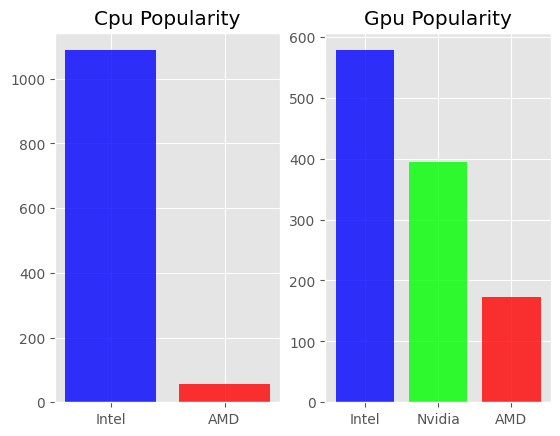

In [135]:
# Popularity of brands

plt.style.use('ggplot')
fig, ax = plt.subplots(1,2)
ax[0].bar(x=['Intel', 'AMD'], height=data['Cpu Brand'].value_counts(), color=[[0,0,1,0.8], [1,0,0,0.8]])
ax[0].set_title('Cpu Popularity')

ax[1].bar(x=['Intel', 'Nvidia', 'AMD'], height=data['Gpu Brand'].value_counts(), color=[[0,0,1,0.8], [0,1,0,0.8], [1,0,0,0.8]])
ax[1].set_title('Gpu Popularity')

In [131]:
data['Gpu Brand'].value_counts()

Gpu Brand
Intel     578
Nvidia    395
AMD       173
Name: count, dtype: int64